In [76]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


DATADIR = '/Users/johnfunk/OneDrive - Eastern Connecticut State University/Courses/Computer Science/Senior-Research/github-project/senior_research/senior_research/data'
CATEGORIES = ['Car', 'Crosswalk', 'Hydrant', 'TrafficLight', 'Palm']
# CATEGORIES = ['Hydrant', 'Palm']

def create_training_data():
    
    data = []

    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        for img in os.listdir(path):
            converted = cv2.imread(os.path.join(path,img))
            new = cv2.resize(converted, (100, 100))
            data.append([new, CATEGORIES.index(category)])

    return data


data = create_training_data()

In [77]:
print(len(data))

5175


In [78]:
import random

random.shuffle(data)

In [79]:
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, 100, 100, 3)
y = np.array(y)

In [80]:
print(X.shape)
print(y.shape)

(5175, 100, 100, 3)
(5175,)


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=32)
input_shape = (100, 100, 3)

In [104]:
print('Length of training dataset: ', len(y_train) - int(len(y_train)*0.1))
print('Length of validation dataset: ', int(len(y_train)*0.1))
print('Length of test dataset: ', len(y_test))

cars_train = 0
crosswalk_train = 0
hydrant_train = 0
trafficlight_train = 0
palm_train = 0
for image in y_train:
    if image == 0:
        cars_train += 1
    elif image == 1:
        crosswalk_train += 1
    elif image == 2:
        hydrant_train += 1
    elif image == 3:
        trafficlight_train += 1
    else:
        palm_train += 1

train_pct = [cars_train/len(y_train), crosswalk_train/len(y_train), hydrant_train/len(y_train), trafficlight_train/len(y_train), palm_train/len(y_train)]
print('\nPercent of each class in training dataset: ', train_pct)

cars_test = 0
crosswalk_test = 0
hydrant_test = 0
trafficlight_test = 0
palm_test = 0
for image in y_test:
    if image == 0:
        cars_test += 1
    elif image == 1:
        crosswalk_test += 1
    elif image == 2:
        hydrant_test += 1
    elif image == 3:
        trafficlight_test += 1
    else:
        palm_test += 1

test_pct = [cars_test/len(y_test), crosswalk_test/len(y_test), hydrant_test/len(y_test), trafficlight_test/len(y_test), palm_test/len(y_test)]
print('\nPercent of each class in test dataset: ', test_pct)


Length of training dataset:  4425
Length of validation dataset:  491
Length of test dataset:  259

Percent of each class in training dataset:  [0.23026851098454026, 0.24389747762408462, 0.1887713588283157, 0.1566314076484947, 0.1804312449145647]

Percent of each class in test dataset:  [0.2625482625482625, 0.23552123552123552, 0.16988416988416988, 0.1583011583011583, 0.17374517374517376]


In [82]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.01)))
model.add(layers.Dense(5))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.32520, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.32520 to 0.41870, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.41870

Epoch 00004: val_accuracy did not improve from 0.41870

Epoch 00005: val_accuracy improved from 0.41870 to 0.53862, saving model to best_model.h5

Epoch 00006: val_accuracy improved from 0.53862 to 0.56707, saving model to best_model.h5

Epoch 00007: val_accuracy improved from 0.56707 to 0.60163, saving model to best_model.h5

Epoch 00008: val_accuracy did not improve from 0.60163

Epoch 00009: val_accuracy improved from 0.60163 to 0.63008, saving model to best_model.h5

Epoch 00010: val_accuracy did not improve from 0.63008

Epoch 00011: val_accuracy improved from 0.63008 to 0.68293, saving model to best_model.h5

Epoch 00012: val_accuracy did not improve from 0.68293

Epoch 00013: val_accuracy improved from 0.68293 to 0.70935, saving model to best_mode

In [83]:
saved_model = tf.keras.models.load_model('best_model.h5')

test_loss, test_acc = saved_model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

259/1 - 1s - loss: 0.8457 - accuracy: 0.8378

Test accuracy: 0.8378378


In [95]:
print('Train loss: ',history.history['loss'][40], '\nValidation loss: ', history.history['val_loss'][40])

Train loss:  0.4747028224722602 
Validation loss:  1.0837566154759104


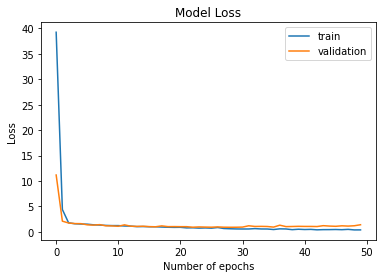

In [128]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

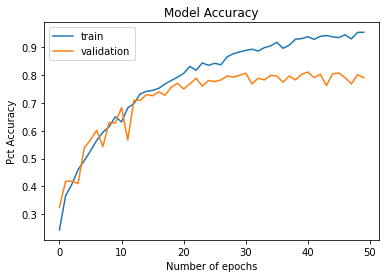

In [129]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Pct Accuracy')
plt.legend()
plt.show()

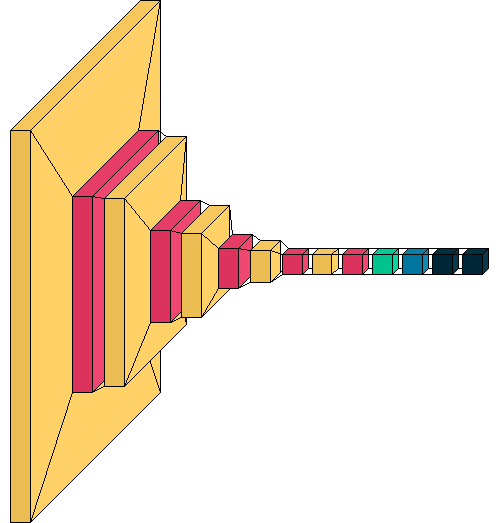

In [86]:
import visualkeras
visualkeras.layered_view(model)

In [87]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 8, 8, 64)        

In [105]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(X_test)

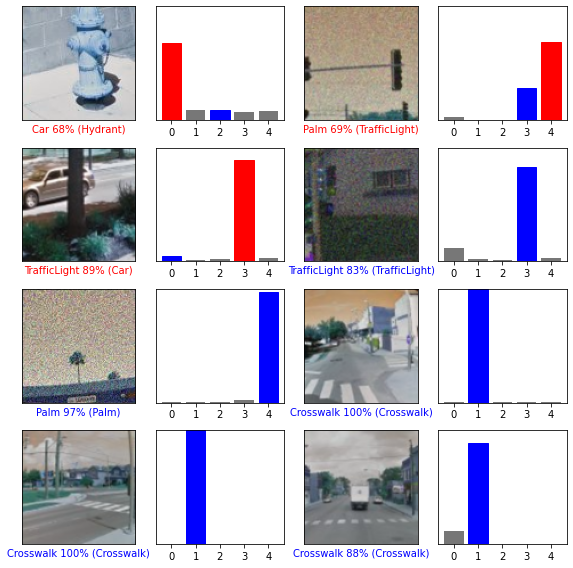

In [106]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(CATEGORIES[predicted_label],
                                100*np.max(predictions_array),
                                CATEGORIES[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(5))
  plt.yticks([])
  thisplot = plt.bar(range(5), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


num_rows = 4
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [107]:
_predictions = []
for i in range(len(predictions)):
    _predictions.append([np.argmax(predictions[i]), y_test[i]])

In [108]:
print(_predictions)
print(len(_predictions))

[[0, 2], [4, 3], [3, 0], [3, 3], [4, 4], [1, 1], [1, 1], [1, 1], [2, 2], [1, 1], [1, 1], [4, 4], [3, 4], [2, 2], [1, 1], [3, 2], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [3, 3], [4, 4], [3, 4], [4, 4], [0, 0], [0, 0], [1, 1], [2, 2], [3, 4], [2, 3], [2, 2], [1, 1], [2, 2], [4, 4], [0, 1], [1, 1], [2, 2], [3, 3], [4, 4], [1, 1], [1, 1], [1, 1], [2, 2], [0, 4], [0, 1], [3, 3], [0, 4], [2, 2], [0, 0], [0, 0], [2, 2], [1, 1], [2, 2], [0, 0], [1, 0], [1, 1], [3, 3], [0, 2], [2, 2], [2, 2], [4, 0], [0, 2], [4, 3], [1, 1], [4, 4], [2, 2], [1, 1], [2, 2], [0, 0], [4, 4], [0, 0], [1, 1], [3, 4], [1, 1], [0, 0], [3, 3], [0, 0], [1, 1], [3, 3], [0, 0], [1, 1], [3, 3], [3, 3], [0, 0], [1, 1], [2, 2], [1, 3], [0, 0], [1, 1], [0, 0], [4, 4], [0, 0], [0, 1], [3, 1], [2, 2], [0, 1], [1, 1], [4, 4], [0, 4], [1, 1], [2, 2], [3, 3], [4, 4], [0, 0], [3, 0], [3, 3], [1, 1], [1, 1], [3, 0], [4, 4], [3, 3], [3, 3], [2, 0], [0, 0], [0, 0], [2, 2], [3, 4], [0, 0], [4, 4], [2, 2], [0, 0], [0, 0], [2, 2],

In [153]:
false_predictions = [] # 0 is case when predicted palm but true value is hydrant, 1 is when predicted hydrant but true value is palm
correct_predictions = []
_y_test = y_test.tolist()

indeces = []

i = 0
for prediction in _predictions:
    if prediction[0] != prediction[1]:
        indeces.append(i)
        if prediction[0] == 0:
            false_predictions.append(0)
        elif prediction[0] == 1:
            false_predictions.append(1)
        elif prediction[0] == 2:
            false_predictions.append(2)
        elif prediction[0] == 3:
            false_predictions.append(3)
        elif prediction[0] == 4:
            false_predictions.append(4)
    i = i + 1


for prediction in _predictions:
    if prediction[0] == prediction[1]:
        if prediction[0] == 0:
            correct_predictions.append(0)
        elif prediction[0] == 1:
            correct_predictions.append(1)
        elif prediction[0] == 2:
            correct_predictions.append(2)
        elif prediction[0] == 3:
            correct_predictions.append(3)
        elif prediction[0] == 4:
            correct_predictions.append(4)

print('Correct predictions: ', len(correct_predictions))
print('Incorrect predictions: ', len(false_predictions))

Correct predictions:  207
Incorrect predictions:  52


In [154]:
print(indeces)

[0, 1, 2, 12, 15, 24, 30, 31, 36, 45, 46, 48, 56, 59, 62, 63, 64, 74, 88, 94, 95, 97, 100, 106, 110, 114, 118, 148, 150, 153, 155, 156, 169, 172, 173, 177, 180, 183, 193, 211, 213, 215, 218, 222, 223, 229, 230, 243, 248, 250, 253, 258]


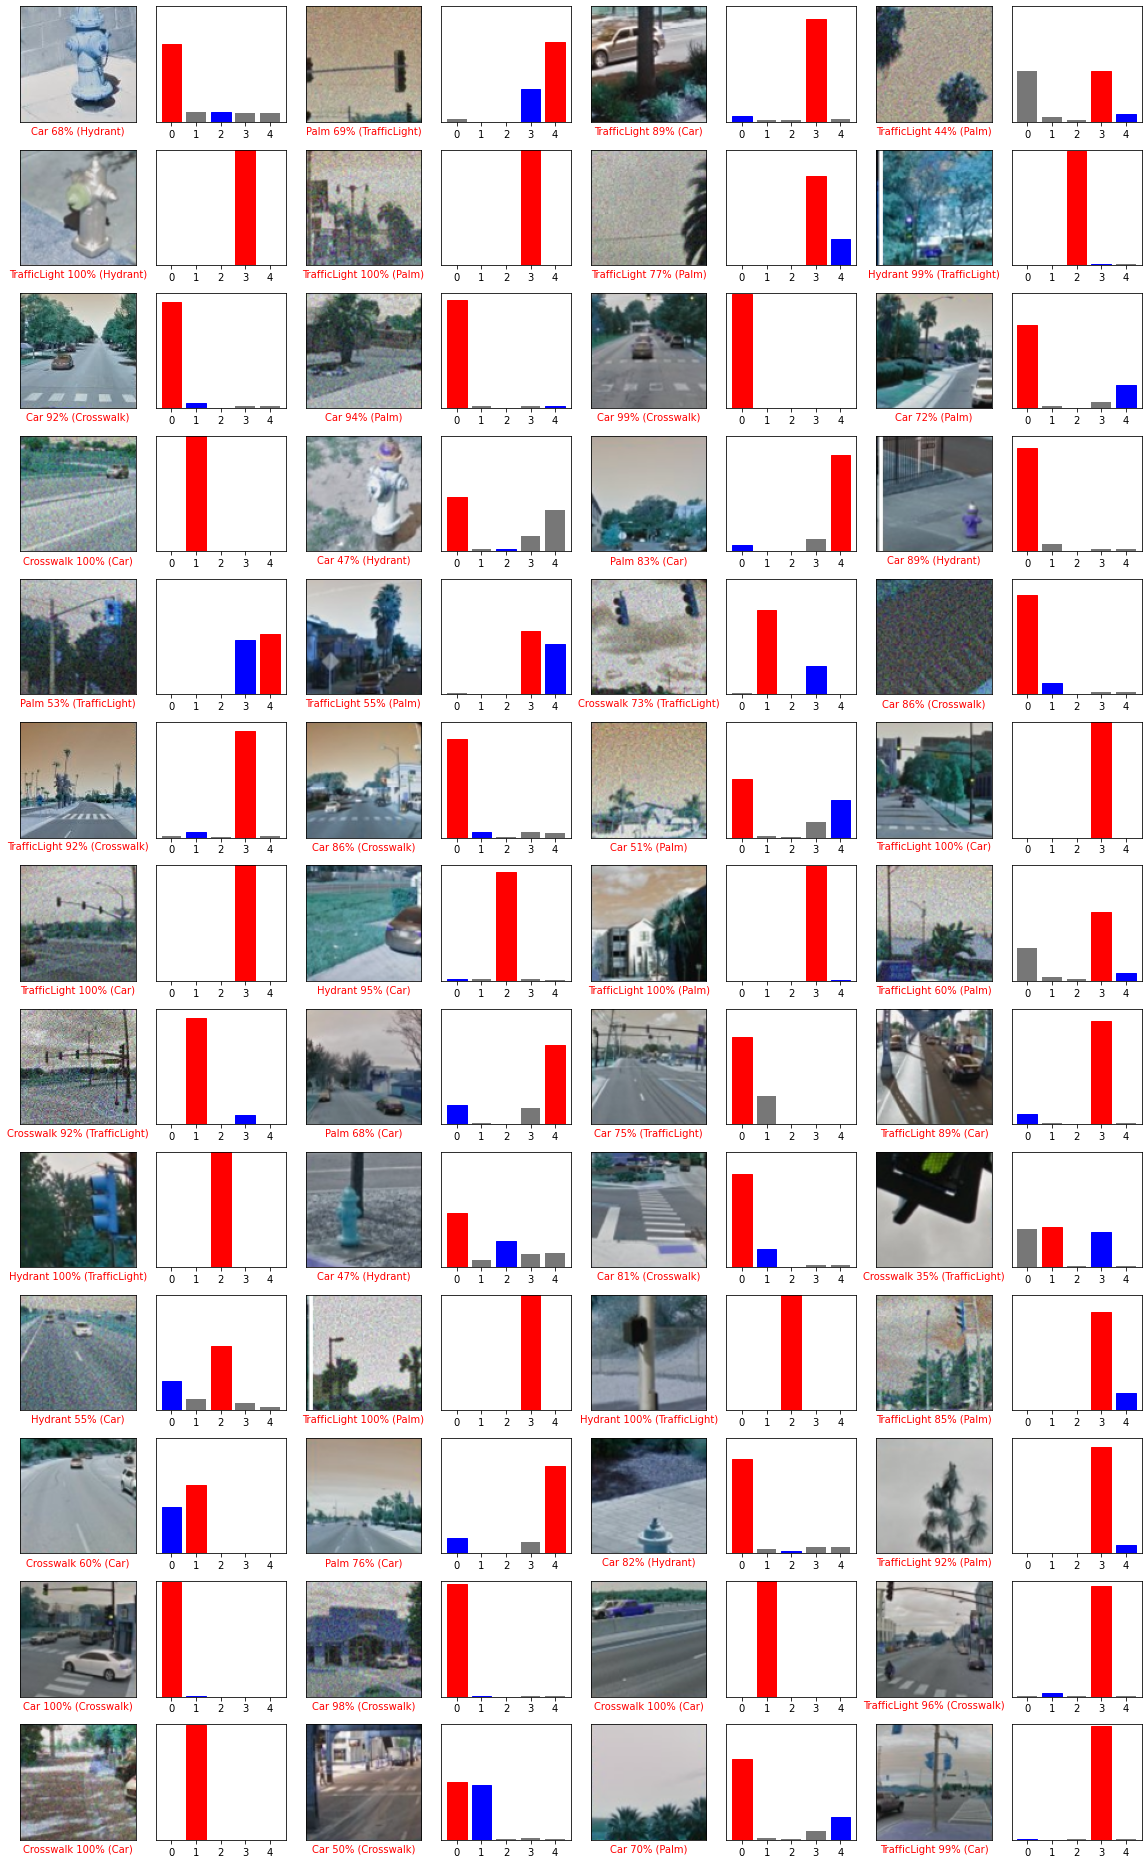

In [155]:
num_rows = 13
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(indeces[i], predictions[indeces[i]], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(indeces[i], predictions[indeces[i]], y_test)
plt.tight_layout()
plt.show()

<class 'list'>


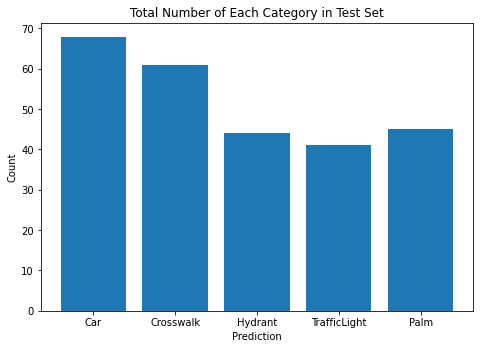

In [110]:
print(type(_y_test))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pred = ['Car', 'Crosswalk', 'Hydrant', 'TrafficLight', 'Palm']
count = [_y_test.count(0), _y_test.count(1), _y_test.count(2), _y_test.count(3), _y_test.count(4)]
ax.bar(pred, count)
plt.title('Total Number of Each Category in Test Set')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.show()

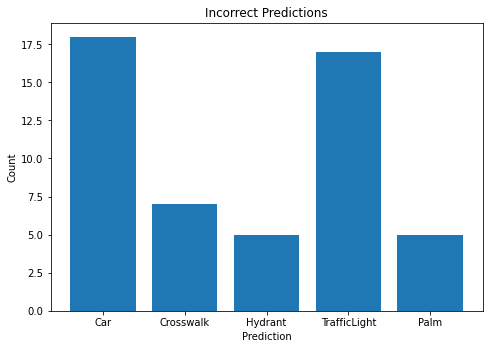

In [111]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pred = ['Car', 'Crosswalk', 'Hydrant', 'TrafficLight', 'Palm']
count = [false_predictions.count(0), false_predictions.count(1), false_predictions.count(2), false_predictions.count(3), false_predictions.count(4)]
ax.bar(pred, count)
plt.title('Incorrect Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.show()

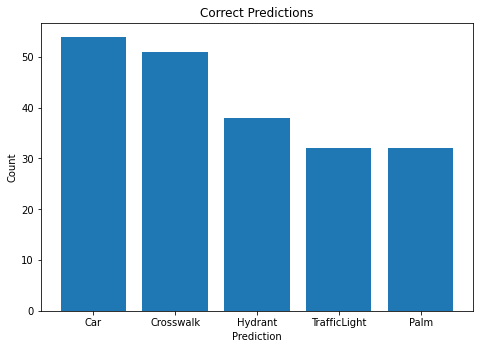

In [112]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pred = ['Car', 'Crosswalk', 'Hydrant', 'TrafficLight', 'Palm']
count = [correct_predictions.count(0), correct_predictions.count(1), correct_predictions.count(2), correct_predictions.count(3), correct_predictions.count(4)]
ax.bar(pred, count)
plt.title('Correct Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.show()

Car Prediction Accuracy:  75.0
Crosswalk Prediction Accuracy:  87.93103448275862
Hydrant Prediction Accuracy:  88.37209302325581
TrafficLight Prediction Accuracy:  65.3061224489796
Palm Prediction Accuracy:  86.48648648648648


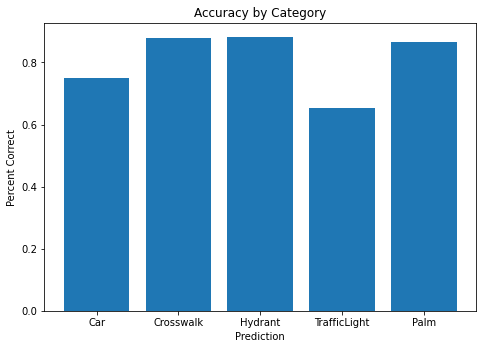

In [113]:
print('Car Prediction Accuracy: ', 100*correct_predictions.count(0)/(correct_predictions.count(0)+false_predictions.count(0)))
print('Crosswalk Prediction Accuracy: ', 100*correct_predictions.count(1)/(correct_predictions.count(1)+false_predictions.count(1)))
print('Hydrant Prediction Accuracy: ', 100*correct_predictions.count(2)/(correct_predictions.count(2)+false_predictions.count(2)))
print('TrafficLight Prediction Accuracy: ', 100*correct_predictions.count(3)/(correct_predictions.count(3)+false_predictions.count(3)))
print('Palm Prediction Accuracy: ', 100*correct_predictions.count(4)/(correct_predictions.count(4)+false_predictions.count(4)))


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pred = ['Car', 'Crosswalk', 'Hydrant', 'TrafficLight', 'Palm']

pct = [
    correct_predictions.count(0)/(correct_predictions.count(0)+false_predictions.count(0)), 
    correct_predictions.count(1)/(correct_predictions.count(1)+false_predictions.count(1)), 
    correct_predictions.count(2)/(correct_predictions.count(2)+false_predictions.count(2)), 
    correct_predictions.count(3)/(correct_predictions.count(3)+false_predictions.count(3)), 
    correct_predictions.count(4)/(correct_predictions.count(4)+false_predictions.count(4))
]

ax.bar(pred, pct)
plt.title('Accuracy by Category')
plt.xlabel('Prediction')
plt.ylabel('Percent Correct')
plt.show()